In [716]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image,cmap='gray')

In [717]:
im_gt = cv2.imread('./kodim23_hr.jpg')
im_gt = cv2.cvtColor(im_gt, cv2.COLOR_BGR2GRAY)
im_noisy = cv2.imread('./kodim23_lr.jpg')
im_noisy= cv2.cvtColor(im_noisy, cv2.COLOR_BGR2GRAY)

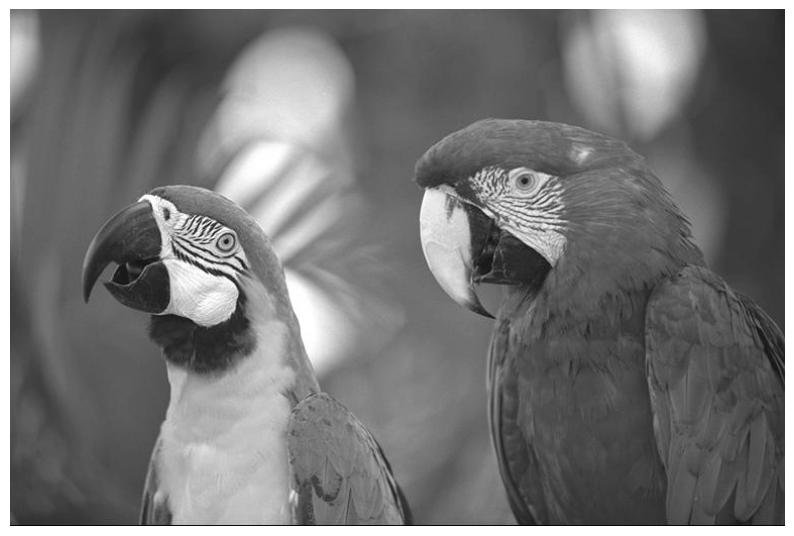

In [718]:
visualize(im_gt)

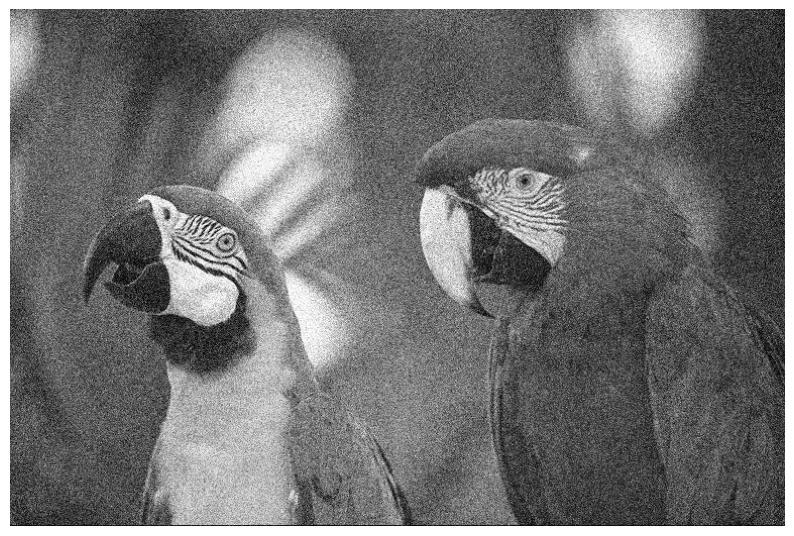

In [719]:
visualize(im_noisy)

In [720]:
import numpy as np
import albumentations.augmentations.geometric.transforms as gt
def randAugment(N, M, p, mode="all", cut_out = False):
  # Magnitude(M) search space  
  shift_x = np.linspace(0,150,10)
  shift_y = np.linspace(0,150,10)
  rot = np.linspace(0,30,10)
  shear = np.linspace(0,10,10)
  sola = np.linspace(0,256,10)
  post = [4,4,5,5,6,6,7,7,8,8]
  cont = [np.linspace(-0.8,-0.1,10),np.linspace(0.1,2,10)]
  bright = np.linspace(0.1,0.7,10)
  shar = np.linspace(0.1,0.9,10)
  cut = np.linspace(0,60,10)
  # Transformation search space
  Aug =[#0 - geometrical
        # A.ShiftScaleRotate(shift_limit_x=shift_x[M], rotate_limit=0, shift_limit_y=0, shift_limit=shift_x[M], p=p),
        # A.ShiftScaleRotate(shift_limit_y=shift_y[M], rotate_limit=0, shift_limit_x=0, shift_limit=shift_y[M], p=p),
        gt.Affine(rotate=rot[M], p=p),
        gt.Affine(shear=shear[M], p=p),
        A.InvertImg(p=p),
        #5 - Color Based
        A.Equalize(p=p),
        A.Solarize(threshold=sola[M], p=p),
        A.Posterize(num_bits=post[M], p=p),
        A.RandomContrast(limit=[cont[0][M], cont[1][M]], p=p),
        A.RandomBrightness(limit=bright[M], p=p)
        ]
        # A.IAASharpen(alpha=shar[M], lightness=shar[M], p=p)]
  # Sampling from the Transformation search space
  if mode == "geo": 
    ops = np.random.choice(Aug[0:5], N)
  elif mode == "color": 
    ops = np.random.choice(Aug[5:], N)
  else:
    ops = np.random.choice(Aug, N)
  
  if cut_out:
    np.append(ops,A.Cutout(num_holes=8, max_h_size=int(cut[M]), max_w_size=int(cut[M]), p=p))
  transforms = A.Compose(ops,additional_targets={'image0': 'image'})
  return transforms, ops

In [721]:
_, ops = randAugment(N=3, M=7, p=0.5, mode="all", cut_out=True)
i_t = [A.RandomResizedCrop(224,224),A.HorizontalFlip(),A.VerticalFlip(),gt.Transpose()] 
ops = np.append(ops,i_t)
transform = A.Compose(ops, additional_targets={'image0': 'image'})

In [722]:
transformed = transform(image=im_gt, image0=im_noisy)

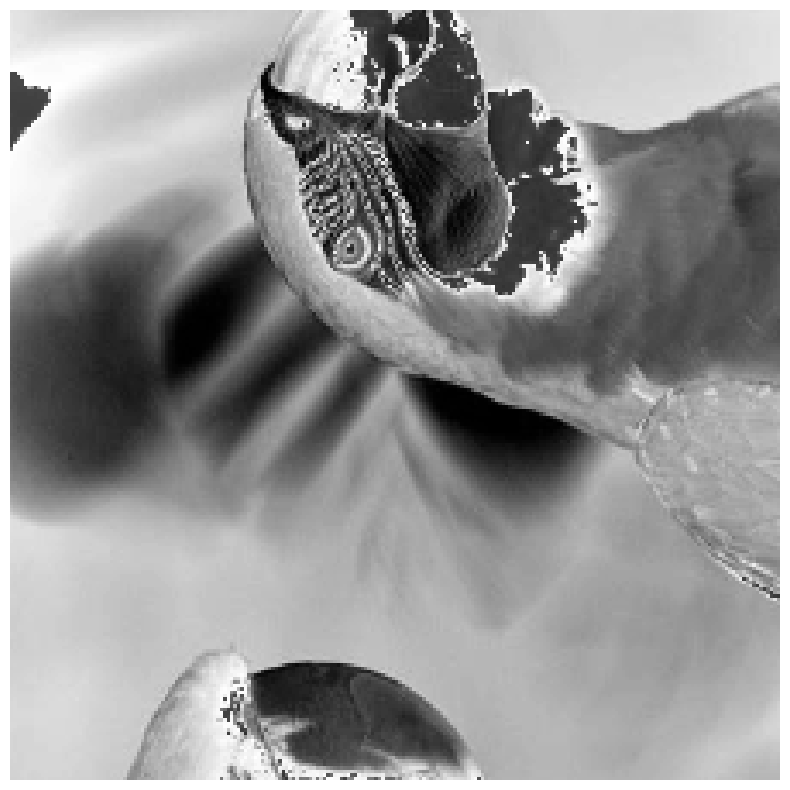

In [723]:
visualize(transformed['image'])

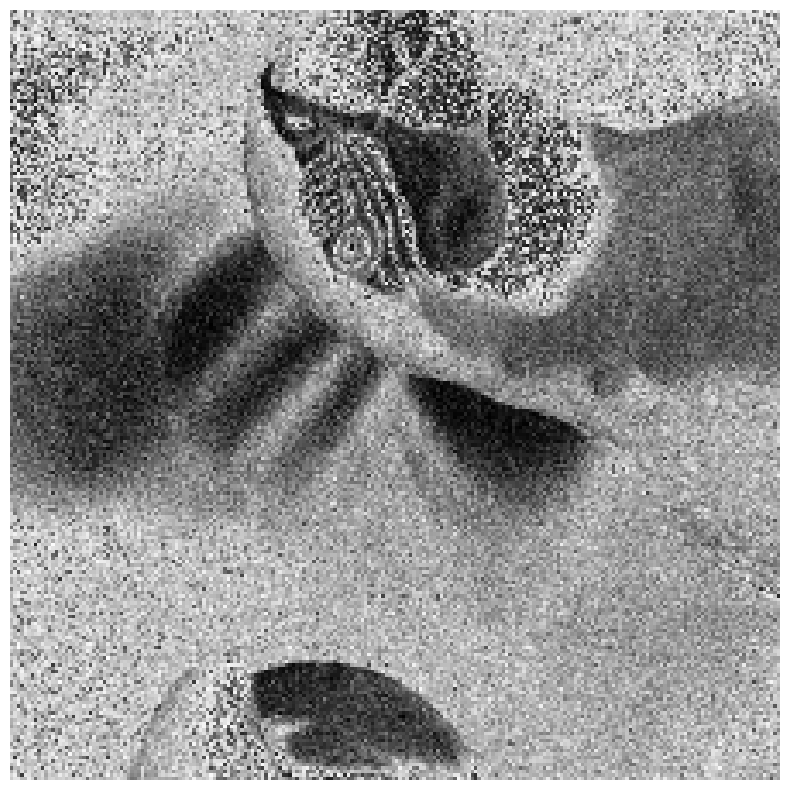

In [724]:
visualize(transformed['image0'])